In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# The code to install the required library

# Importing seaborn and reading the Excel file
import seaborn as sns
df = pd.read_excel("analise.xlsx")
Agua = "Consumo_Agua_Litros"
Energia = "Consumo_Energia_kWh"
co2 = "Emissao_Gases_CO2e_kg"
Pais = "Região_Fabricante"

Estatisticas descritivas

In [66]:
print(df.describe(include='all'))

       Categoria     Cliente_ID  Consumo_Agua_Litros  Consumo_Energia_kWh  \
count      10674   10674.000000         10674.000000         10674.000000   
unique         5            NaN                  NaN                  NaN   
top         Casa            NaN                  NaN                  NaN   
freq        2842            NaN                  NaN                  NaN   
mean         NaN  538627.035694            13.366726            69.442095   
min          NaN  100042.000000             0.100000             0.100000   
25%          NaN  318141.000000             2.150000             4.872500   
50%          NaN  531972.000000             5.130000            12.500000   
75%          NaN  760661.000000            13.240000            32.487500   
max          NaN  999816.000000            99.700000           798.420000   
std          NaN  256528.515620            19.814236           145.521796   

        Custo_Produção                    Data_Compra  \
count     10674.00

In [5]:
df = df.drop(columns=['Cliente_ID'])

In [6]:
# Verificar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())
print(df.isna().sum())


Valores nulos por coluna:
Categoria                0
Consumo_Agua_Litros      0
Consumo_Energia_kWh      0
Custo_Produção           0
Data_Compra              0
Data_Receção             0
Emissao_Gases_CO2e_kg    0
Fabricante               0
País_Fabricante          0
Preço_Unitário           0
Produto                  0
Produto_ID               0
Quantidade_Vendida       0
Região_Fabricante        0
dtype: int64
Categoria                0
Consumo_Agua_Litros      0
Consumo_Energia_kWh      0
Custo_Produção           0
Data_Compra              0
Data_Receção             0
Emissao_Gases_CO2e_kg    0
Fabricante               0
País_Fabricante          0
Preço_Unitário           0
Produto                  0
Produto_ID               0
Quantidade_Vendida       0
Região_Fabricante        0
dtype: int64


In [7]:
# Distribuição de categorias
print("\nDistribuição de categorias:")
print(df['Categoria'].value_counts())



Distribuição de categorias:
Categoria
Casa          2842
Moda          2452
Beleza        1985
Alimentos     1922
Eletrónica    1473
Name: count, dtype: int64


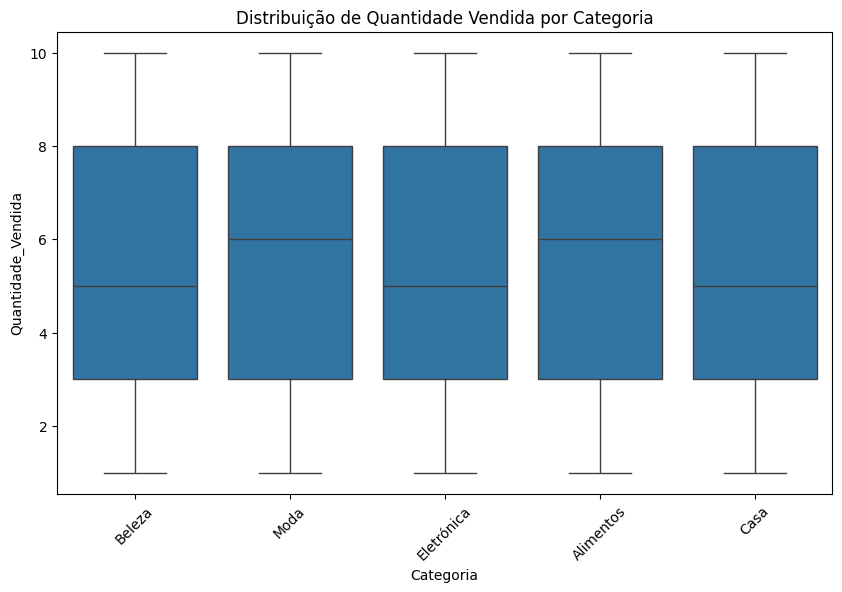

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Categoria', y='Quantidade_Vendida')
plt.title('Distribuição de Quantidade Vendida por Categoria')
plt.xticks(rotation=45)
plt.show()

In [9]:
print("\nCorrelação entre variáveis numéricas:")
print(df.select_dtypes(include=['number']).corr())


Correlação entre variáveis numéricas:
                       Consumo_Agua_Litros  Consumo_Energia_kWh  \
Consumo_Agua_Litros               1.000000             0.835588   
Consumo_Energia_kWh               0.835588             1.000000   
Custo_Produção                    0.838365             0.857585   
Emissao_Gases_CO2e_kg             0.014920             0.016425   
Preço_Unitário                    0.849433             0.856379   
Produto_ID                       -0.450189            -0.511518   
Quantidade_Vendida               -0.008638            -0.004704   

                       Custo_Produção  Emissao_Gases_CO2e_kg  Preço_Unitário  \
Consumo_Agua_Litros          0.838365               0.014920        0.849433   
Consumo_Energia_kWh          0.857585               0.016425        0.856379   
Custo_Produção               1.000000               0.021271        0.932789   
Emissao_Gases_CO2e_kg        0.021271               1.000000        0.015723   
Preço_Unitário          

In [11]:
# Visualização: Mapa de calor de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlação')
plt.show()

ValueError: could not convert string to float: 'Beleza'

<Figure size 1000x600 with 0 Axes>

In [12]:
# Filtrar os dados da categoria "Alimentos"
alimentos_dados = df[(df['Categoria'] == 'Alimentos')]

# Ordenar pelo consumo de energia
alimentos_ordenados_energia = alimentos_dados.sort_values(by='Consumo_Energia_kWh', ascending=False)

# Exibir os resultados
print(alimentos_ordenados_energia[["País_Fabricante",'Produto', 'Consumo_Energia_kWh','Consumo_Agua_Litros','Emissao_Gases_CO2e_kg']])


      País_Fabricante      Produto  Consumo_Energia_kWh  Consumo_Agua_Litros  \
8941           Itália    Cerveja 2                 2.93                 0.65   
8710         Alemanha    Cerveja 3                 2.92                 0.23   
1558           França    Cerveja 1                 2.92                 0.11   
3795         Alemanha    Cerveja 3                 2.92                 0.23   
10118          Itália    Cerveja 3                 2.91                 0.15   
...               ...          ...                  ...                  ...   
9140         Portugal   Bolachas 1                 0.10                 0.10   
1033         Portugal   Bolachas 1                 0.10                 0.10   
10215        Portugal       Água 2                 0.10                 0.11   
753          Portugal       Água 2                 0.10                 0.11   
671          Portugal  Chocolate 1                 0.10                 0.13   

       Emissao_Gases_CO2e_kg  
8941    

In [13]:
max_consumo_agua = df[Agua].max()
min_consumo_agua = df[Agua].min()
w1 = 0.2

max_energia = df[Energia].max()
min_energia = df[Energia].min()
w2 = 0.3
max_emissoes = df[co2].max()
min_emissoes = df[co2].min()
w3 = 0.5
print(f"Máximo consumo de água: {max_consumo_agua}")
indiceagua = w1 * ((df[Agua] - min_consumo_agua)/(max_consumo_agua-min_consumo_agua))
indiceenergia = w2 * ((df[Energia] - min_energia)/(max_energia-min_energia))
indiceemissoes = w3 * ((df[co2] - min_emissoes)/(max_emissoes-min_emissoes))
indice = 1-(indiceagua+indiceenergia+indiceemissoes)

# Adicionar o índice como uma coluna ao dataframe
df['Indice'] = indice

Máximo consumo de água: 99.7


In [19]:
categorias_maior_indice = df.groupby('Categoria')['Indice'].mean().sort_values(ascending=False)
print(categorias_maior_indice)

Categoria
Casa          5402.847643
Alimentos     5400.020291
Beleza        5328.130479
Moda          5324.351958
Eletrónica    5164.353700
Name: Indice, dtype: float64


In [20]:
produtos_mais_poluentes = df.sort_values(by='Indice', ascending=True)
print(produtos_mais_poluentes[['Produto', 'Categoria', 'Indice']].head(10))  # Exibe os 10 produtos mais poluentes

           Produto   Categoria  Indice
0  ProtetorSolar 3      Beleza       1
1       Camisola 3        Moda       2
2        Perfume 2      Beleza       3
3         Shampô 2      Beleza       4
4     Computador 3  Eletrónica       5
5      Televisão 3  Eletrónica       6
6      Chocolate 3   Alimentos       7
7      Telemóvel 1  Eletrónica       8
8       Camisola 2        Moda       9
9        Panelas 3        Casa      10


In [23]:
df_ordenado = df.sort_values(by='Indice', ascending=False)
print(df_ordenado)

       Indice   Categoria  Cliente_ID  Consumo_Agua_Litros  \
10673   10674        Casa      358763                10.23   
10672   10673        Casa      780137                22.15   
10671   10672        Casa      305292                 1.30   
10670   10671      Beleza      782519                 4.18   
10669   10670      Beleza      101385                 6.05   
...       ...         ...         ...                  ...   
4           5  Eletrónica      761627                48.01   
3           4      Beleza      695645                 2.94   
2           3      Beleza      318841                10.82   
1           2        Moda      667016                 3.87   
0           1      Beleza      100042                 3.37   

       Consumo_Energia_kWh  Custo_Produção         Data_Compra Data_Receção  \
10673                29.14           82.70 2023-01-01 00:00:00   2023-01-02   
10672                47.96          481.32 2023-01-01 00:00:00   2023-01-02   
10671             

Mean Squared Error: 8.05609992280339
R-squared Score: 3.360317451994721e-05


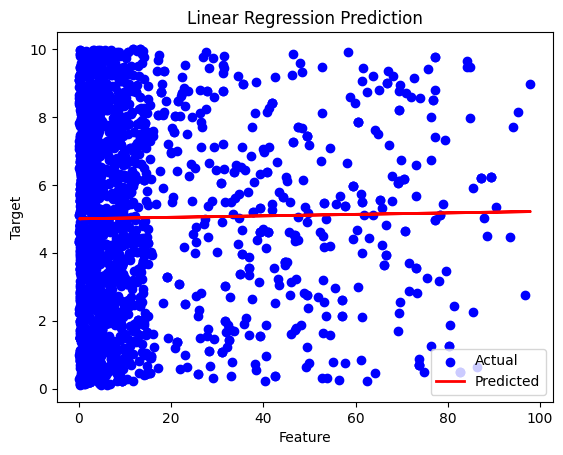

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dados utilizados para a previsão
X = df["Consumo_Agua_Litros"].values.reshape(-1, 1)
y = df["Emissao_Gases_CO2e_kg"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Prediction")
plt.legend()
plt.show()